<a href="https://colab.research.google.com/github/YouliaXX/DataAnalysisProjects/blob/main/Multi_Class_Prediction_of_Cirrhosis_Outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading and primary description

## [Data source](https://www.kaggle.com/competitions/playground-series-s3e26/data?select=train.csv)


## Data description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Cirrhosis Patient Survival Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.

Features:

**N-days**: number of days between registration and the earlier of death, transplantation, or study analysis time

**Age**: in days, int

**Drug**: categorical, two drugs

**Sex**: Two classes - F&M

**Ascites**: appearance of physical symptom - Y/N

**Hepatomegaly**: appearance of physical symptom (enlarged liver) - Y/N

**Spiders**: appearance of physical symptom (small spider-like veins) - Y/N

**Edema**: appearance of physical symptom - Y/N

**Bilirubin**: blood test results, float

**Cholesterol**: blood test results, float

**Albumin**: blood test results, float

**Copper**: blood test results, float

**Alk_Phos**: blood test results, float

**SGOT**: blood test results, float

**Tryglicerides**: blood test results, float

**Platelets**: blood test results, float

**Prothrombin**: blood test results, float

**Stage**: categorical values (1-4)

**Status**: Label, 3 classes: C (censored) indicates the patient was alive at N_Days, CL indicates the patient was alive at N_Days due to liver a transplant, and D indicates the patient was deceased at N_Days

number of days between registration and the earlier of death, transplantation, or study analysis time

> **N_Days is the number of days between registration and the earlier of death, transplantation, or study analysis time, I think we shoud remove it since its an outside parameter that can bias the data.
If someone lasted until the end of the study it's simply because he didn't died and wasn't well enough (or sick enough) for a transplant**

## Our Goal

Our task is to use a multi-class approach to predict the the outcomes of patients with cirrhosis.

We'd like to select the best model, allowing the most precise classification between three classes.

## Data upload

In [ ]:
# all useful libraries
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file_path = '/content/drive/MyDrive/Project 4/playground-series-s3e26.zip'
extracted_dir = '/content/drive/MyDrive/Project 4/>'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
print(os.listdir(extracted_dir))

['sample_submission.csv', 'test.csv', 'train.csv']


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project 4/>/train.csv')

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:

train.head(5).T

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
3755,3755,3839,Placebo,18352,M,N,N,N,N,1.2,346.0,3.48,67.0,2184.0,128.65,100.0,269.0,9.9,3.0,D
4010,4010,3445,Placebo,23445,F,N,Y,Y,N,0.6,286.0,3.94,96.0,856.0,71.30,90.0,410.0,11.5,4.0,C
2656,2656,1447,Placebo,25873,F,Y,Y,N,N,1.4,151.0,3.40,50.0,559.0,73.53,49.0,234.0,13.0,4.0,D
4320,4320,71,Placebo,20567,F,Y,Y,Y,N,3.4,260.0,3.01,77.0,728.0,137.95,68.0,190.0,12.0,4.0,D
1611,1611,1827,Placebo,18964,M,Y,Y,Y,N,1.0,360.0,3.99,380.0,967.0,89.90,154.0,278.0,10.0,3.0,C


In [ ]:
train.info()
train.shape
train.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 3755 to 7270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5533 non-null   int64  
 1   N_Days         5533 non-null   int64  
 2   Drug           5533 non-null   object 
 3   Age            5533 non-null   int64  
 4   Sex            5533 non-null   object 
 5   Ascites        5533 non-null   object 
 6   Hepatomegaly   5533 non-null   object 
 7   Spiders        5533 non-null   object 
 8   Edema          5533 non-null   object 
 9   Bilirubin      5533 non-null   float64
 10  Cholesterol    5533 non-null   float64
 11  Albumin        5533 non-null   float64
 12  Copper         5533 non-null   float64
 13  Alk_Phos       5533 non-null   float64
 14  SGOT           5533 non-null   float64
 15  Tryglicerides  5533 non-null   float64
 16  Platelets      5533 non-null   float64
 17  Prothrombin    5533 non-null   float64
 18  Stage     

,count,mean,std,min,25%,50%,75%,max
id,5533.0,3980.505874,2271.889482,1.00,2035.00,3972.00,5964.00,7902.00
N_Days,5533.0,2031.740286,1085.502845,41.00,1235.00,1832.00,2689.00,4795.00
Age,5533.0,18326.591542,3690.814730,9598.00,15526.00,18499.00,20684.00,28650.00
Bilirubin,5533.0,2.526676,3.647229,0.30,0.70,1.10,2.90,28.00
Cholesterol,5533.0,352.044280,198.003275,120.00,248.00,299.00,390.00,1775.00
Albumin,5533.0,3.548610,0.345420,1.96,3.35,3.58,3.77,4.64
Copper,5533.0,82.774806,74.163166,4.00,39.00,63.00,101.00,588.00
Alk_Phos,5533.0,1823.073992,1894.478243,289.00,834.00,1174.00,1860.00,13862.40
SGOT,5533.0,114.197219,48.298560,26.35,75.95,106.95,137.95,457.25
Tryglicerides,5533.0,115.490692,51.557918,33.00,85.00,104.00,139.00,598.00


# Proposed transformations to be done on the data:
1. 'id' and N_days columns were removed
2. The train was checked for dublications: None were detected
3. The train was checked for unique values
5.  Age in days transformed to years
5. Textual categorical values replaced with numerical
6. and more...

In [ ]:
#Remove id column
train.drop(columns='id', inplace=True)

In [ ]:
#Remove N_days column
train.drop(columns='N_Days', inplace=True)

In [ ]:
#check for duplicates
duplicates_all = train[train.duplicated()]
duplicates_all

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7212,D-penicillamine,19540,F,N,N,N,N,0.3,233.0,4.08,20.0,622.0,66.65,68.0,358.0,9.9,2.0,D


In [ ]:
#Turn age to years with 2 two decimal places
train['Age_years'] = train['Age'] / 365.25
train['Age_years'] = train['Age_years'].round(2)

In [ ]:
train.nunique()

Drug               2
Age              376
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        108
Cholesterol      219
Albumin          153
Copper           168
Alk_Phos         344
SGOT             201
Tryglicerides    149
Platelets        221
Prothrombin       49
Stage              4
Status             3
Age_years        364
dtype: int64

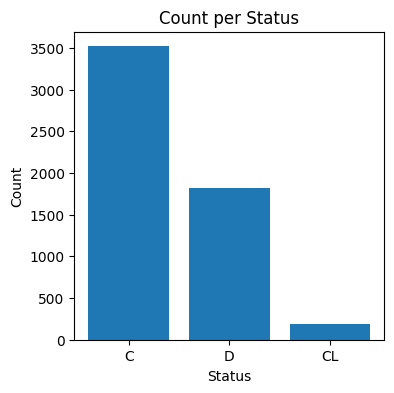

In [ ]:
plt.figure(figsize = (4,4))
status_counts = train['Status'].value_counts()
plt.bar(status_counts.index, status_counts.values)
plt.title('Count per Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks()
plt.show()

### Insight: Two statuses, C and D represent the majority.
CL, liver transplantations, is a very small class, represented by less than 300 cases

# Data vizualization

### Box Plots

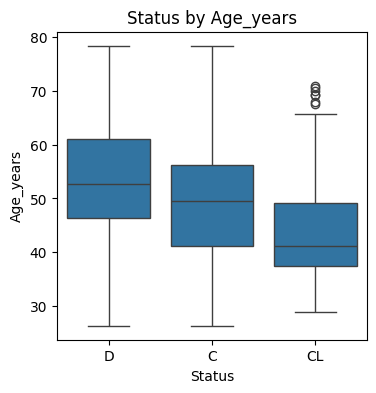

In [ ]:
plt.figure(figsize = (4,4))
sns.boxplot(data=train, x='Status', y='Age_years')
plt.title('Status by Age_years')
plt.xlabel('Status')
plt.ylabel('Age_years')
plt.show()

Insight: Statuses C and D are represented in all ages categories, status CL has outliers, that will need special treatment.

It is importent to note that status CL is detrmined by doctors (who is a good candidate for a transplent) and not a medical condiation.

### Cirrhosis physical symptoms

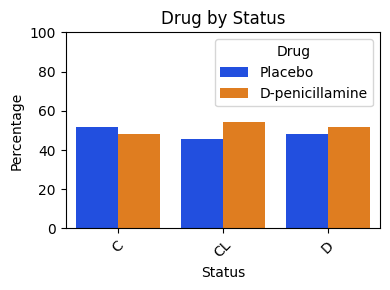

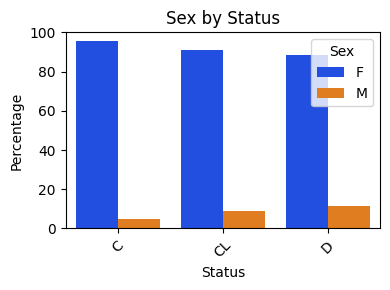

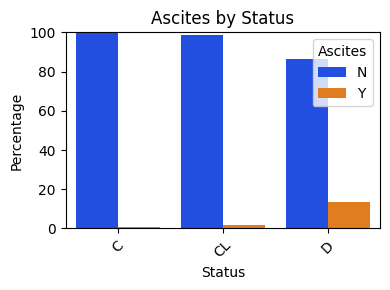

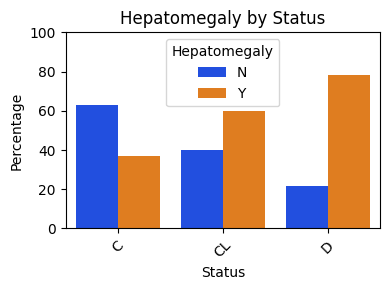

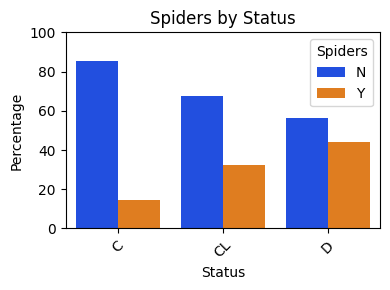

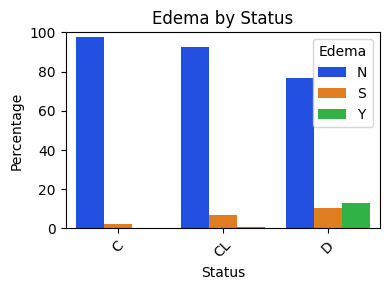

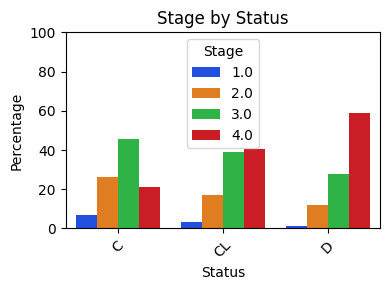

In [ ]:
columns_to_plot = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

for column in columns_to_plot:
    plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
    data_by_status = train.groupby('Status')[column].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
    sns.barplot(data=data_by_status, x='Status', y='Percentage', hue=column, palette='bright')
    plt.title(f'{column} by Status')
    plt.xlabel('Status')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()
    plt.show()

Most patients are Female, but males have highr risk to die.

Not surprisingly, the worse the phys symptomes are, the more likely the patient to die.

We mapped tht physiological parameters to numerics and used a combined score to create a phys_symptomes score

### Replacing other categorical text values with numerical.

In [ ]:
train['Drug'] = train['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})
train['Sex'] = train['Sex'].map({'F': 1, 'M': 0})
train['Ascites'] = train['Ascites'].map({'Y': 1, 'N': 0})
train['Hepatomegaly'] = train['Hepatomegaly'].map({'Y': 1, 'N': 0})
train['Spiders'] = train['Spiders'].map({'Y': 1, 'N': 0})
train['Edema'] = train['Edema'].map({'S': 2, 'Y': 1, 'N': 0})

### Age distribution, per Status

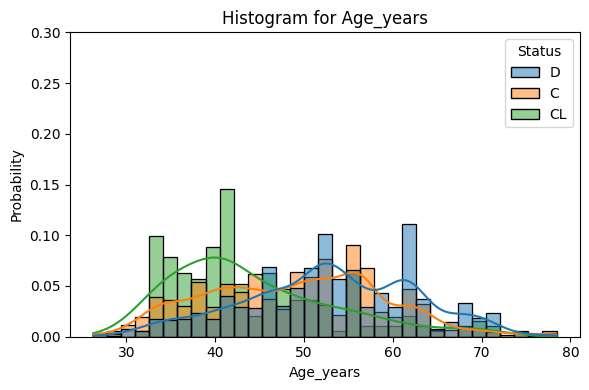

In [ ]:
columns_to_plot = ['Age_years']
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=train, x=column, hue='Status', kde=True, stat='probability', common_norm=False)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.ylim(0,0.3)  # y-axis limit
    plt.tight_layout()
    plt.show()

**Insight** Age is mainly correlated to the CL group, since the younger the patient is, the more likely a doctor will recommend transplantation

# Normalizations and correlations

### Blood tests results

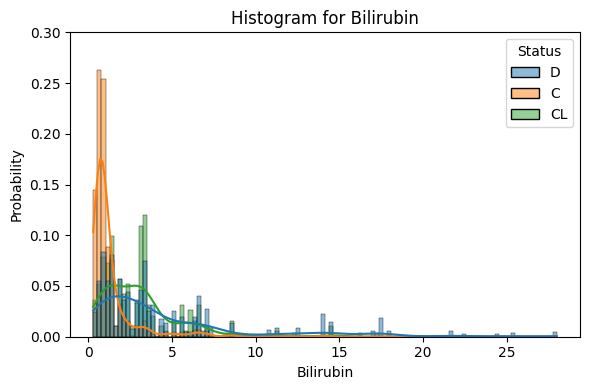

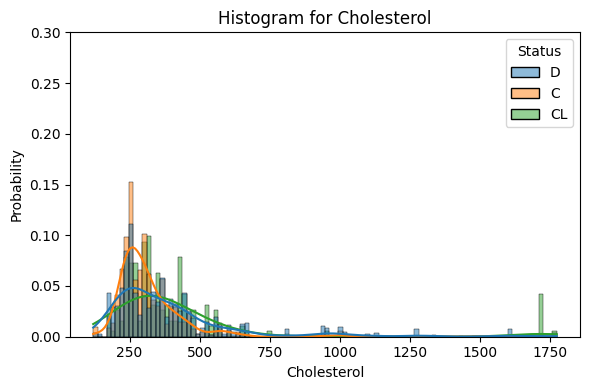

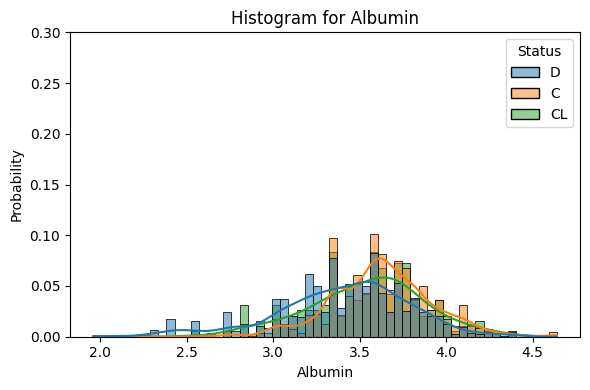

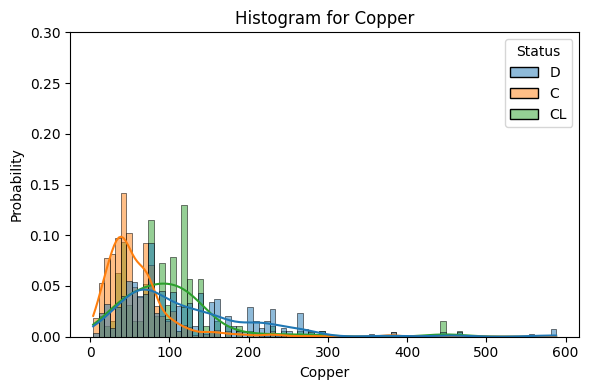

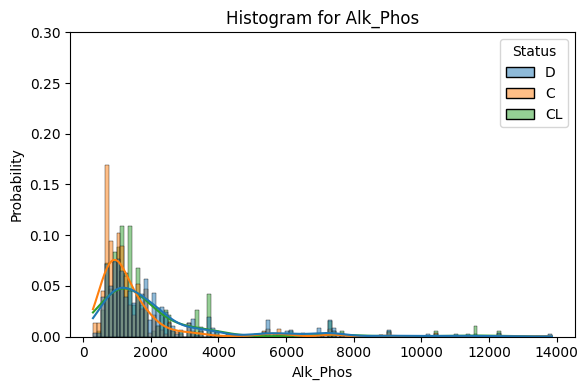

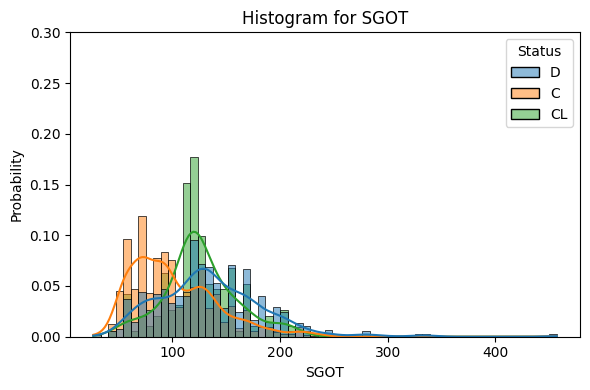

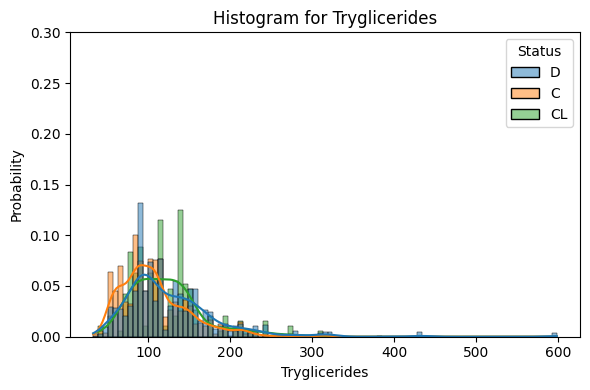

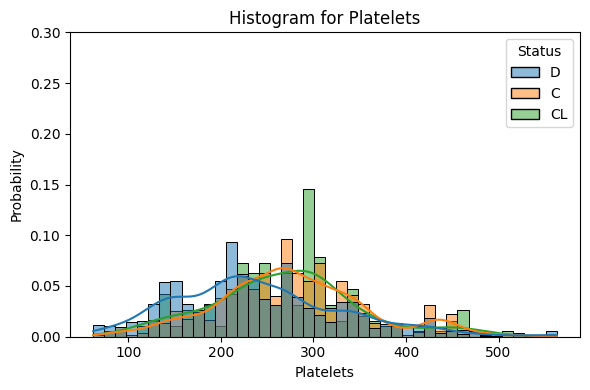

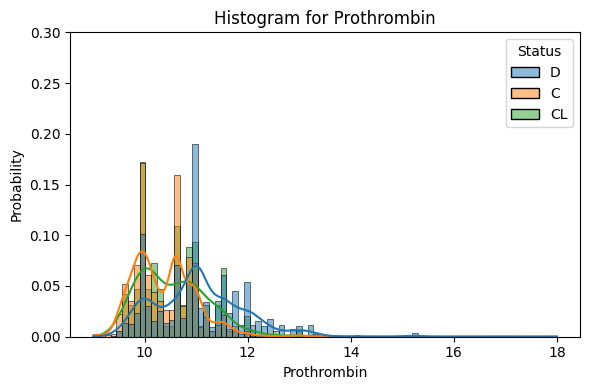

In [ ]:
columns_to_plot = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=train, x=column, hue='Status', kde=True, stat='probability', common_norm=False)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.ylim(0,0.3)  # y-axis limit
    plt.tight_layout()
    plt.show()

There seem to be correlation for many of the blood tests with the label. mainly with Bilirubin, which is tigtly related to liver function.

We normalize according to medicaly accepted scores

### Normalizing Blood test according to medical accepted scores

In [ ]:
#Albumin score from https://www.hepatitis.va.gov/cirrhosis/background/stages.asp
conditions = [
    train['Albumin'] > 3.5,
    (train['Albumin'] >= 2.8) & (train['Albumin'] <= 3.5),
    train['Albumin'] < 2.8
]

scores = [1, 2, 3]
train['Albumin_score'] = np.select(conditions, scores, default=np.nan)

#Bilirubin score from https://www.hepatitis.va.gov/cirrhosis/background/stages.asp
conditions = [
    train['Bilirubin'] > 3.5,
    (train['Bilirubin'] >= 2.8) & (train['Bilirubin'] <= 3.5),
    train['Bilirubin'] < 2.8
]

scores = [1, 2, 3]
train['Bilirubin_score'] = np.select(conditions, scores, default=np.nan)

#Cholesterol score from https://www.hepatitis.va.gov/cirrhosis/background/stages.asp
conditions = [
    train['Cholesterol'] > 240,
    (train['Cholesterol'] >= 200) & (train['Cholesterol'] <= 240),
    train['Cholesterol'] < 200
]

scores = [1, 2, 3]
train['Cholesterol_score'] = np.select(conditions, scores, default=np.nan)

#Copper score from https://www.hepatitis.va.gov/cirrhosis/background/stages.asp
conditions = [
    train['Copper'] > 158.9,
    (train['Copper'] >= 63) & (train['Copper'] <= 158.9),
    train['Copper'] < 63
]

scores = [1, 2, 3]
train['Copper_score'] = np.select(conditions, scores, default=np.nan)

#SGOT score
conditions = [
    train['SGOT'] > 100,
    (train['SGOT'] >= 45) & (train['SGOT'] <= 100),
    train['SGOT'] < 45
]

scores = [1, 2, 3]
train['SGOT_score'] = np.select(conditions, scores, default=np.nan)

#Tryglicerides score
conditions = [
    train['Tryglicerides'] < 150,
    (train['Tryglicerides'] >= 150) & (train['Tryglicerides'] < 200),
    (train['Tryglicerides'] >= 200) & (train['Tryglicerides'] < 500),
    train['Tryglicerides'] >= 500
]

scores = [1, 2, 3, 4]
train['Tryglicerides_score'] = np.select(conditions, scores, default=np.nan)

#Prothrombin score
conditions = [
    train['Prothrombin'] > 13.5,
    (train['Prothrombin'] >= 11) & (train['Prothrombin'] <= 13.5),
    train['Prothrombin'] < 11
]

scores = [1, 2, 3]
train['Prothrombin_score'] = np.select(conditions, scores, default=np.nan)

### Pretty plotly histograms and violin charts for blood test results

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

measurements = [
    {"column": "Albumin", "title": "Levels of Albumin in Plasma, normal range in yellow", "x0": 3.5, "x1": 5, "label": "Albumin, g/dL"},
    {"column": "Cholesterol", "title": "Levels of Cholesterol in Plasma, normal range in yellow", "x0": 0, "x1": 200, "label": "Cholesterol, mg/dL"},
    {"column": "Bilirubin", "title": "Levels of Bilirubin in Plasma, normal range in yellow", "x0": 0.1, "x1": 1.2, "label": "Bilirubin, mg/dL"},
    {"column": "Copper", "title": "Levels of Copper in Plasma, normal range in yellow", "x0": 64, "x1": 159, "label": "Copper, mcg/dL"},
    {"column": "Alk_Phos", "title": "Levels of Alk_Phos in Plasma, normal range in yellow", "x0": 44, "x1": 147, "label": "Alk_Phos, U/L"},
    {"column": "SGOT", "title": "Levels of SGOT in Plasma, normal range in yellow", "x0": 8, "x1": 45, "label": "SGOT, U/L"},
    {"column": "Tryglicerides", "title": "Levels of Tryglicerides in Plasma, normal range in yellow", "x0": 0.1, "x1": 150, "label": "Tryglicerides, U/L"},
    {"column": "Platelets", "title": "Levels of Platelets in Plasma, normal range in yellow", "x0": 150, "x1": 450, "label": "Platelets, #10^3/mcL"},
    {"column": "Prothrombin", "title": "Levels of Prothrombin in Plasma, normal range in yellow", "x0": 10, "x1": 13, "label": "Prothrombin, sec"}
]

for measurement in measurements:
    fig = px.histogram(train, x=measurement["column"],
                       title=measurement["title"],
                       labels={measurement["column"]: measurement["label"]},
                       marginal="violin", nbins=30, width=500, height=400)
    fig.add_vrect(x0=measurement["x0"], x1=measurement["x1"], fillcolor="yellow", opacity=0.3, line_width=0)
    fig.update_layout(width=500, height=400)
    fig.show()


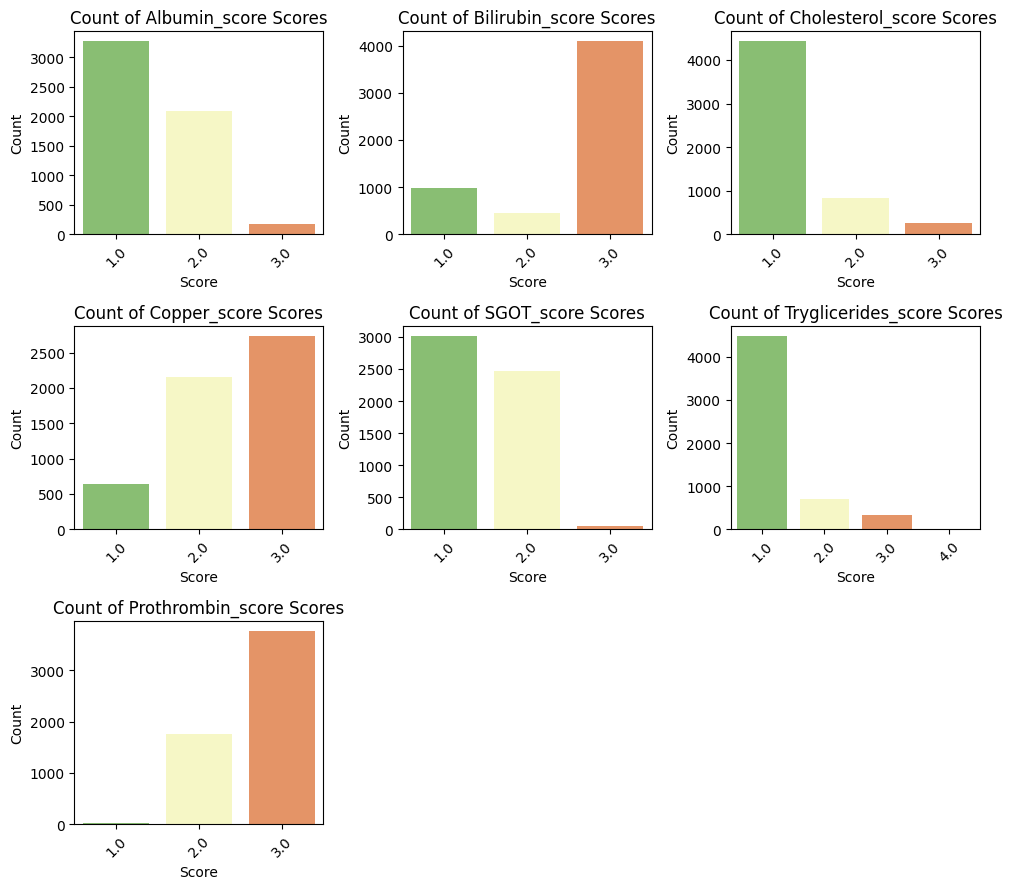

In [ ]:
# Custom colormap from green to red (reversed)
colors = sns.color_palette("RdYlGn", 3)[::-1]

columns_to_plot = ['Albumin_score', 'Bilirubin_score', 'Cholesterol_score', 'Copper_score', 'SGOT_score', 'Tryglicerides_score', 'Prothrombin_score']

# Determine the number of rows and columns for the grid
num_cols = 3
num_rows = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Flatten the axes if needed
if len(columns_to_plot) > 1:
    axes = axes.flatten()

# Loop through each column and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=train, x=column, palette=colors, ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show(block=False)


### Insights

>Normal ranges can't help us for categorization, because the patients already sick and therefore many bloodwork parameters are abnormal.

> Outliers in some of the blood parameters can be discarded


# Correlation matrix

### Replacing Status (label) textual variables to Status_num for correlation purposes

In [ ]:
train['Status_num'] = train['Status'].map({'D': 2, 'C': 1, 'CL':0})

In [ ]:
columns_to_normalize = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT','Tryglicerides', 'Platelets', 'Prothrombin']

In [ ]:
for column in columns_to_normalize:
    # Calculate mean and standard deviation
    mean = train[column].mean()
    std = train[column].std()

    # Define threshold for values beyond 3 standard deviations
    threshold_upper = mean + 3 * std
    threshold_lower = mean - 3 * std

    # Apply transformation to create the new "norm" column
    train[f'{column}_norm'] = train[column].apply(lambda x: threshold_upper if x > threshold_upper else (threshold_lower if x < threshold_lower else x))

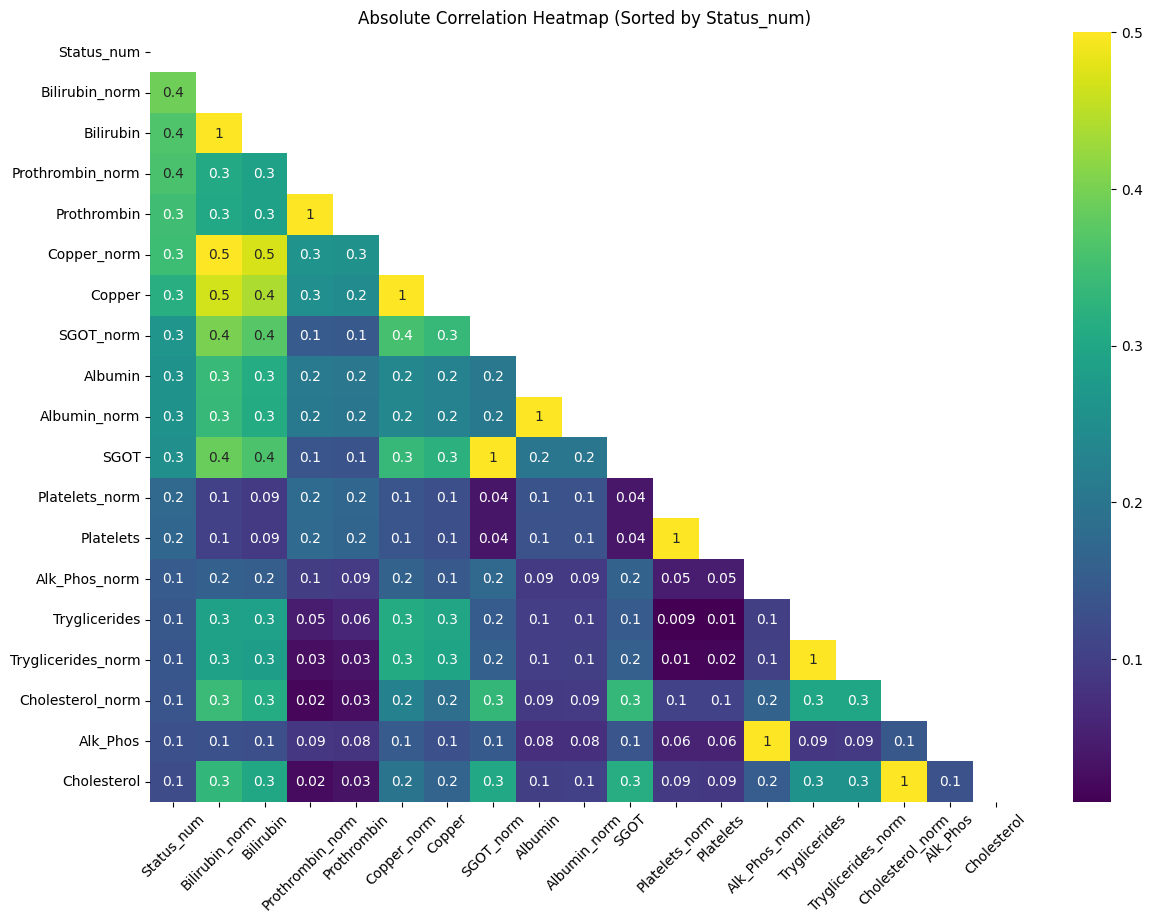

In [ ]:
# Selecting specific columns for correlation matrix, displayed by heatmap
selected_columns = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin','Bilirubin_norm', 'Cholesterol_norm', 'Albumin_norm',
                    'Copper_norm', 'Alk_Phos_norm', 'SGOT_norm', 'Tryglicerides_norm', 'Platelets_norm', 'Prothrombin_norm', 'Status_num']

selected_data = train[selected_columns]

# correlation matrix
corr_matrix = selected_data.corr()

# Take the absolute values of correlation coefficients
corr_matrix_abs = np.abs(corr_matrix)

# Sort the correlation matrix by "Status_num" column
sorted_indices = corr_matrix_abs["Status_num"].sort_values(ascending=False).index
corr_matrix_sorted = corr_matrix_abs.reindex(index=sorted_indices, columns=sorted_indices)

# Masking
mask = np.triu(np.ones_like(corr_matrix_sorted, dtype=bool))

# Plotting
plt.figure(figsize=(14, 10))
sns.heatmap(data=corr_matrix_sorted, mask=mask, cmap="viridis", annot=True, vmax=0.5,  fmt='.1g', )
plt.title('Absolute Correlation Heatmap (Sorted by Status_num)')
plt.xticks(rotation=45)
plt.show()


It's hard to decide which normalization of the blood test is most informative.
We can't live all in the data set, because it might bias the model or create noise.

I order to choose one score/normalization for each blood test we run 2 simple models - Xxgb and lgbm, and run each with different combination 10,000 times. we than choose for each blood test the normalization that gave the highst score.

## Adding 2 New Features

> 'phys_symptoms'  - the sum of all physical parameters ('Ascites', 'Hepatomegaly', 'Spiders','Edema')

> 'part_CPT' - CTP category from [Source](https://www.hepatitis.va.gov/cirrhosis/background/stages.asp). The sum of ['Ascites']+['Albumin_score']+['Bilirubin_score']+['Prothrombin_score']

In [ ]:
train['part_CTP'] = train['Ascites']+train['Albumin_score']+train['Bilirubin_score']+train['Prothrombin_score']

In [ ]:
train['phys_symptoms']=train[['Ascites','Hepatomegaly','Spiders','Edema']].sum(axis=1)

# EDA conclusions
1. Among the 3 classes of labels, 'CL' is underrepresented. Use 'stratify' for X/y split
2. The blood data has right-skewed normal distribution with long tail.
2. Two methods were used to normalize blood test parameters: STDScaler and categorizing by medically accepted norms.

3. Two additional features were added:
  
  * combinations of scores for physical symptoms
  * combinations of scores for parameters in one of the medical scoring method (CTP)

4. All textual variables were replaced by numerical


# Pipeline

In [ ]:
!pip install catboost
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Project 4/>/train.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Status']), train['Status'], test_size=0.3, stratify=train['Status'], random_state=42)


In [ ]:
class AgeConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Age_years'] = (X_transformed['Age'] / 365.25).round(2)  # Convert 'Age' to years with two decimal places
        return X_transformed

In [ ]:
class AlbuminScoreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        conditions = [
            X['Albumin'] > 3.5,
            (X['Albumin'] >= 2.8) & (X['Albumin'] <= 3.5),
            X['Albumin'] < 2.8
        ]
        scores = [1, 2, 3]
        X['Albumin_score'] = np.select(conditions, scores, default=np.nan)
        return X

In [ ]:
class BilirubinScoreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        conditions = [
            X['Bilirubin'] > 3.5,
            (X['Bilirubin'] >= 2.8) & (X['Bilirubin'] <= 3.5),
            X['Bilirubin'] < 2.8
        ]
        scores = [1, 2, 3]
        X['Bilirubin_score'] = np.select(conditions, scores, default=np.nan)
        return X

In [ ]:
class ProthrombinScoreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        conditions = [
            X['Prothrombin'] > 13.5,
            (X['Prothrombin'] >= 11) & (X['Prothrombin'] <= 13.5),
            X['Prothrombin'] < 11
        ]
        scores = [1, 2, 3]
        X['Prothrombin_score'] = np.select(conditions, scores, default=np.nan)
        return X

In [ ]:
class STD_NormalizationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_normalize):
        self.columns_to_normalize = columns_to_normalize

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for column in self.columns_to_normalize:
            # Calculate mean and standard deviation
            mean = X[column].mean()
            std = X[column].std()

            # Define threshold for values beyond 3 standard deviations
            threshold_upper = mean + 3 * std
            threshold_lower = mean - 3 * std

            # Apply transformation to create the new "norm" column
            X[f'{column}_STD_norm'] = X[column].apply(lambda x: threshold_upper if x > threshold_upper else (threshold_lower if x < threshold_lower else x))
        return X

In [ ]:
class CategoricalToNumericTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mapping):
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column, map_dict in self.mapping.items():
            if column == 'Status':
                # Add a new column 'status_num' based on existing 'Status' values
                X_transformed['status_num'] = X_transformed['Status'].map(map_dict)
            else:
                # Map values for other columns
                X_transformed[column] = X_transformed[column].map(map_dict)
        return X_transformed

mapping = {
    'Drug': {'D-penicillamine': 1, 'Placebo': 0},
    'Sex': {'F': 1, 'M': 0},
    'Ascites': {'Y': 1, 'N': 0},
    'Hepatomegaly': {'Y': 1, 'N': 0},
    'Spiders': {'Y': 1, 'N': 0},
    'Edema': {'S': 2, 'Y': 1, 'N': 0},
    #'Status': {'D': 3, 'C': 2, 'CL':1}

}

In [ ]:
class FeatureCreationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_columns, new_feature_name):
        self.feature_columns = feature_columns
        self.new_feature_name = new_feature_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.new_feature_name] = X_transformed[self.feature_columns].sum(axis=1)
        #X_transformed.drop(columns=self.feature_columns, inplace=True)
        return X_transformed

In [ ]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.columns is None:
            return X
        else:
            X_transformed = X.drop(columns=self.columns, errors='ignore')
            return X_transformed

In [ ]:
# Define the EDA pipeline for initial data preprocessing
eda_pipeline_preprocess = Pipeline([
    ('age_converter', AgeConverter()),  # Custom transformer to convert 'Age' to 'Age_years'
    ('albumin_score', AlbuminScoreTransformer()),  # Calculate 'Albumin_score'
    ('bilirubin_score', BilirubinScoreTransformer()), # Calculate 'Bilirubin_score'
    ('Prothrombin_Score',ProthrombinScoreTransformer()),  # Calculate Prothrombin_Score
    ('STD_normalization', STD_NormalizationTransformer(columns_to_normalize=['Cholesterol','SGOT','Platelets'])),  # Normalize columns
    ('categorical_to_numeric', CategoricalToNumericTransformer(mapping)),  # Convert categorical to numeric
    ('phys_symptoms_creation', FeatureCreationTransformer(['Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], 'phys_symptoms')),  # Create 'phys_symptoms' feature
    ('part_CTP_creation', FeatureCreationTransformer(['Ascites', 'Albumin_score', 'Bilirubin_score', 'Prothrombin_score'], 'part_CTP')),  # Create 'part_CTP' feature
    ('drop_columns', DropColumnsTransformer(columns=['id', 'N_Days', 'Age','Cholesterol', 'Albumin','SGOT','Platelets','Prothrombin','Bilirubin_score'])),  # Remove columns
])

In [ ]:
# Fit the preprocessing pipeline to obtain the preprocessed data
train_eda_preprocessed = eda_pipeline_preprocess.fit_transform(X_train)

In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Encoding Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label Encoding Mapping:
C: 0
CL: 1
D: 2


### Model grid

In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Define additional parameters for each model
catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.1, 0.05],
    'depth': [6, 8]
}

gradient_boosting_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

# Selected models
models = {
    'CatBoostClassifier': CatBoostClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42)
}

# Define custom scoring function
def custom_score(y_true, y_pred):
    weights = {0: 2, 2: 2, 1: 1}
    score = sum(weights[true] if true == pred else 0 for true, pred in zip(y_true, y_pred))
    return score / len(y_true)

# Define a custom scorer
custom_scorer = make_scorer(custom_score)

class ModelSwitcher:
    def __init__(self, models, param_grids):
        self.models = models
        self.param_grids = param_grids
        self.best_params = {}
        self.best_model = None

    def fit(self, X, y):
        self.scores = {}
        for name, model in self.models.items():
            print(f"Fitting {name}...")
            param_grid = self.param_grids[name]
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring=custom_scorer)
            grid_search.fit(X, y)
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            self.scores[name] = best_score
            self.best_params[name] = best_params
            print(f"{name} cross-validation score: {best_score}")
            print(f"Best parameters for {name}: {best_params}")

        best_model_name = max(self.scores, key=self.scores.get)
        print(f"Best model: {best_model_name} with custom score: {self.scores[best_model_name]}")
        print(f"Best parameters for {best_model_name}: {self.best_params[best_model_name]}")
        self.best_model = self.models[best_model_name]

    def get_best_model(self):
        return self.best_model, self.best_params[self.best_model.__class__.__name__]


# Instantiate ModelSwitcher
model_switcher = ModelSwitcher(models, {
    'CatBoostClassifier': catboost_params,
    'GradientBoostingClassifier': gradient_boosting_params,
    'LGBMClassifier': lgbm_params,
    'XGBClassifier': xgb_params
})

# Fit the models and choose the best one
model_switcher.fit(train_eda_preprocessed, y_train_encoded)

# Get the best model
best_model, best_params = model_switcher.get_best_model()

# Fit the best model with the best parameters
best_model.set_params(**best_params)
best_model.fit(train_eda_preprocessed, y_train_encoded)




Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Best model and its parameters

Best model: XGBClassifier with custom score: 1.6267925138564228

Best parameters for XGBClassifier:

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
# Predict Y values using the best model
y_pred = best_model.predict(train_eda_preprocessed)

# Calculate confusion matrix
cm = confusion_matrix(y_train_encoded, y_pred)

# Plot heatmap
categories=['C', 'CL', 'D']

fig = px.imshow(cm, text_auto=".2f", color_continuous_scale='ice', aspect="equal")
fig.update_xaxes(side="top", tickvals=[0, 1, 2], ticktext=categories)
fig.update_yaxes(tickvals=[0, 1, 2], ticktext=categories)
fig.update_layout(
    width=400,
    height=400,
    xaxis_title="Train: Predicted",
    yaxis_title="Train: Actual",
    title="Best Model: Train Confusion Matrix",
    title_x=0.5,  # Center the title
    xaxis=dict(title_standoff=5)
   )
fig.show()


# Test: Prediction, Scoring and Visualization

In [ ]:
X_test = test.drop(columns = ['Status'])
y_test = test['Status']

In [ ]:
# encoding/decoding class for y
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()

    def fit(self, y):
        self.encoder.fit(y)
        return self

    def transform(self, y):
        # Transform the target values to numerical labels
        return self.encoder.transform(y)

    def inverse_transform(self, y):
        # Inverse transform numerical labels back to original target values
        return self.encoder.inverse_transform(y)


In [ ]:
target_encoder = TargetEncoder().fit(y_test)
y_test_encoded = target_encoder.transform(y_test)

In [ ]:
test_eda_preprocessed = eda_pipeline_preprocess.fit_transform(X_test)

In [ ]:
y_train_pred = best_model.predict(train_eda_preprocessed)
y_test_pred = best_model.predict(test_eda_preprocessed)

# Confusion matrices
cm_train = confusion_matrix(y_train_encoded, y_train_pred)
cm_test = confusion_matrix(y_test_encoded, y_test_pred)

# Calculating precision and recall for both train and test sets
precision_train = precision_score(y_train_encoded, y_train_pred, average = 'macro')
precision_test = precision_score(y_test_encoded, y_test_pred, average = 'macro')
recall_train = recall_score(y_train_encoded, y_train_pred, average = 'macro')
recall_test = recall_score(y_test_encoded, y_test_pred, average = 'macro' )
f1_train = f1_score(y_train_encoded, y_train_pred, average = 'macro')
f1_test = f1_score(y_test_encoded, y_test_pred, average = 'macro')

# Visualization
categories = [ 'C','CL', 'D']

# Train confusion matrix with plotly
fig = px.imshow(cm_train, text_auto=".2f", color_continuous_scale='ice', aspect="equal")
fig.update_xaxes(side="top", tickvals=[0, 1, 2], ticktext=categories)
fig.update_yaxes(tickvals=[0, 1, 2], ticktext=categories)
fig.update_layout(
    width=400,
    height=400,
    xaxis_title="Predicted",
    yaxis_title="Actual",
    title="XGB: Train Confusion Matrix",
    title_x=0.5,  # Center the title
    margin=dict(t=100),
    xaxis=dict(title_standoff=5)
)
fig.show()
fig = px.imshow(cm_test, text_auto=".2f", color_continuous_scale='ice', aspect="equal")
fig.update_xaxes(side="top", tickvals=[0, 1, 2], ticktext=categories)
fig.update_yaxes(tickvals=[0, 1, 2], ticktext=categories)
fig.update_layout(
    width=400,
    height=400,
    xaxis_title="Predicted",
    yaxis_title="Actual",
    title="XGB: Test Confusion Matrix",
    title_x=0.5,  # Center the title
    margin=dict(t=100),
    xaxis=dict(title_standoff=5)
)
fig.show()

# Accuracy, Precision, and Recall comparison
metrics = ['Precision', 'Recall', 'F1']
train_scores = [precision_train, recall_train, f1_train]
test_scores = [precision_test, recall_test, f1_test]

# Creating a DataFrame for the scores
best_scores_df = pd.DataFrame({
    'Metrics_xgb': ['Precision', 'Recall', 'F1 Score'],
    'Train': [precision_train, recall_train, f1_train],
    'Test': [precision_test, recall_test, f1_test]
})

best_scores_df.set_index('Metrics_xgb', inplace=True)
best_scores_df

,Train,Test
Metrics_xgb,,
Precision,0.890517,0.872657
Recall,0.742733,0.694719
F1 Score,0.791977,0.741641


# Conclusions and lessons learned

1. Unfortunately, only later on we've found out, that out "test" file doesn't contain labels. The  purpose of the competition was to predict.proba for each case (row) of the test. We had to split the train dataset, eventually reducing its size by 30%.

2. EDA remains to be the most demanding part, understanding the meaning of the data is not so simple. We had to learn a lot about this medical condition.

3. Comparing between the models, as they run separately is still troublesome, especially when feature sets change.

4. The GridSearch takes a lot of time, next time, start with 2-3 parameters for shorter lists of attributes.

5. The best model in our case was XGBClassifier:

  Best parameters for XGBClassifier:

  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
6. The scores (precision, recall and f1) were pretty good for the test as well as for the train.

7. The misclassificaiton between C and D classes could be improved.
